In [9]:
from utils import *
import utils
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from proto import caffe_pb2

In [4]:
import pyparrots
import string, os
from pyparrots.env import Environ
import pyparrots.dnn as dnn
import yaml

os.chdir('/home/wangxinglu/prj/few-shot/models/res101.img1k/')
session_file = './session.yaml'
model_file = "./model.yaml"
param_file = "snapshots/iter.best.parrots"

mapping = dict(gpu='6:8', bs=8 * 2, )

# read model file
with open(model_file) as fin:
    model_text = fin.read()
# read session file
with open(session_file, 'r') as fcfg:
    cfg_templ_in = fcfg.read()
cfg_templ = string.Template(cfg_templ_in)

cfg_text = cfg_templ.substitute(mapping)

cfg_text = yaml.dump(yaml.load(cfg_text))

# yaml.load(model_text)
# yaml.load(cfg_text)

# create model
model = dnn.Model.from_yaml_text(model_text)


In [1]:
# create session
# session = dnn.Session.from_yaml_text(model, cfg_text)

In [ ]:
session.setup()
f = session.flow('val')
f.load_param(param_file)

In [16]:
%cd ../resnet101/
f=h5py.File('./model.1k.parrots')
# f.keys()
f=h5py.File('./model.10k.flat.caffe.parrots')
# f.keys()
f=h5py.File('./model.1k.caffe.parrots')
# f.keys()

/mnt/nfs1703/test/prj/few-shot/models/resnet101


In [3]:
# os.chdir('/home/wangxinglu/prj/few-shot/src/')
# utils.init_dev(utils.get_dev())
# utils.allow_growth()
import os 
os.chdir('/home/wangxinglu/prj/few-shot/models/res101.img1k')
%pwd

u'/mnt/nfs1703/test/prj/few-shot/models/res101.img1k'

In [45]:
ori_size_img_path = '/home/imagenet/ilsvrc12_val_lmdb/'

import lmdb
ori_size_img_lmdb = lmdb.open(ori_size_img_path)
txn = ori_size_img_lmdb.begin()
cursor = txn.cursor()

In [95]:
pc = cursor
pc.first()

True

33108

True

970

(256, 256, 3)

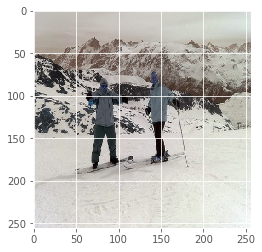

In [97]:
datum = caffe_pb2.Datum()
datum.ParseFromString(pc.value())
pc.next()
lbs.append(datum.label)

import cv2

im_buf = np.fromstring(datum.data, dtype=np.uint8)
ori_im = cv2.imdecode(im_buf, cv2.CV_LOAD_IMAGE_COLOR)
datas.append()
ori_im.shape
# plt.imshow(ori_im)


In [ ]:
# write the model file to work dir
model_bak = os.path.join(self.runner.work_dir, 'model.yaml')
with open(model_bak, 'w') as fout:
    fout.write(self.runner.model.to_yaml_text())
# write the session config file to work dir
session_bak = os.path.join(self.runner.work_dir, 'session.yaml')
self.runner.config.dump(session_bak, model={'yaml': 'model.yaml'})
self.runner.setup()
# log model info
logging.info("model name: %s", self.runner.model.name)
logging.debug(self.runner.model.to_yaml_text())
# run!
self.runner.run()